# Logistic Regression for Identifying Depression Among Students

# Overview
In this task, you will use Logistic Regression to predict whether a student is experiencing depression based on different factors such as academic pressure, sleep habits, and financial stress. You will go through the full machine learning process, from exploring the data to training and evaluating a model. You are also encouraged to create visualizations to better understand the data and support your analysis.

## Dataset
We will use the Student Depression Dataset (good timing after mid term exam I guess).

### Features:
- **Gender**: Male/Female
- **Age**: Student’s age
- **City**: City where the student lives
- **Academic Pressure**: Level of academic stress
- **Work Pressure**: Level of work-related stress
- **CGPA**: Student’s academic performance
- **Study Satisfaction**: How satisfied the student is with their studies
- **Job Satisfaction**: Satisfaction with a job (if applicable)
- **Sleep Duration**: Sleep hours category (e.g., "Less than 5 hours", "5-6 hours")
- **Dietary Habits**: Eating habits (e.g., Healthy, Moderate)
- **Degree**: The degree the student is pursuing
- **Suicidal Thoughts**: Whether the student has had suicidal thoughts (Yes/No)
- **Work/Study Hours**: Hours spent working or studying daily
- **Financial Stress**: Level of financial pressure
- **Family History of Mental Illness**: Whether the student has a family history of mental illness (Yes/No)
- **Depression**: (Target variable: 1 = Has depression, 0 = No depression)

## Tasks
### **Use the df DataFrame from the cell below for all tasks.**
### Task 1 – Explore the Data
    Understand the dataset and find interesting patterns :
        - Use basic pandas functions to check the data.
        - Look for missing values, outliers, and patterns in the features.
        - Create visualizations such as heatmap, histograms, bar charts, scatter plots etc. to explore relationships between different features and depression.

### Task 2 – Data Preprocessing
    Clean and prepare the data for modeling : 
        - Handle missing values (e.g., filling or removing them). 
        - Convert categorical variables into numbers using encoding. 
        - Normalize or standardize numerical features if needed.
        - Explain why you made certain preprocessing choices.

### Task 3 – Train the Model
    Train a Logistic Regression model to predict depression : 
        - Split the data into training and testing sets.
        - Train a Logistic Regression model using scikit-learn. Look at the different parameters in scikit learn libraries ant try to change some of them (only if you can understand them).
        - Make predictions on the test data.

### Task 4 – Evaluate the Model
    Measure how well the model performs : 
        - Calculate accuracy, precision, recall, and F1-score.
        - Create a confusion matrix to see how often the model makes correct and incorrect predictions.
        - Plot an ROC curve to analyze model performance.
        - Think on how we could analyse predicted probabilities

#### Some documentation 

[Seaborn Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
[Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
(There are many different plots and possible analysis to do with Seaborn. Navigate by yourself and feel free to do some insighful analysis)

[Imputing values](https://scikit-learn.org/stable/modules/impute.html)

[scikit-learn preprocessing documentation](https://scikit-learn.org/stable/modules/preprocessing.html)

[Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[Classification metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Student Depression Dataset.csv")
df = df.drop(columns=['id'])

df.sample(5)

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
10443,Male,27.0,Bangalore,Student,5.0,0.0,7.28,2.0,0.0,More than 8 hours,Moderate,B.Com,Yes,12.0,2.0,Yes,1
13665,Male,26.0,Visakhapatnam,Student,4.0,0.0,5.64,1.0,0.0,5-6 hours,Unhealthy,B.Ed,Yes,7.0,2.0,Yes,1
748,Male,19.0,Hyderabad,Student,1.0,0.0,6.99,2.0,0.0,5-6 hours,Moderate,Class 12,No,0.0,1.0,Yes,0
195,Male,33.0,Kanpur,Student,2.0,0.0,9.54,3.0,0.0,7-8 hours,Healthy,MA,No,11.0,4.0,Yes,0
10080,Male,20.0,Indore,Student,4.0,0.0,8.91,1.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,7.0,3.0,No,1


# Task 1 Exploring data 

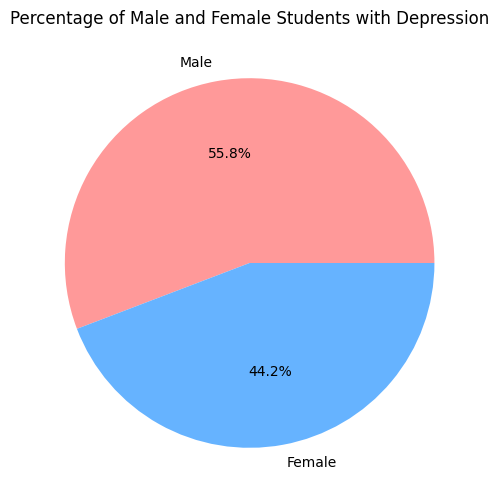

In [6]:
depressed_students = df[df['Depression'] == 1]

depressed_gender_counts  = depressed_students['Gender'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(depressed_gender_counts, labels=depressed_gender_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])

plt.title('Percentage of Male and Female Students with Depression')
plt.show()

In [7]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['number']).columns 


unique_values = {col: df[col].unique() for col in categorical_columns}

range_values = {col: (df[col].min(), df[col].max()) for col in numerical_columns}


unique_values_df = pd.DataFrame([(col, ', '.join(map(str, unique_values[col]))) for col in unique_values],
                                columns=['Column', 'Unique Values'])

range_values_df = pd.DataFrame([(col, v[0], v[1]) for col, v in range_values.items()],
                                columns=['Column', 'Min Value', 'Max Value'])

pd.set_option('display.max_colwidth', None)  # show full text in columns
pd.set_option('display.max_rows', None)      # show all rows 

print("Unique Values:")
print(unique_values_df.to_string(index=False))  # print without truncation

print("\nRanges")
print(range_values_df.to_string(index=False))

Unique Values:
                               Column                                                                                                                                                                                                                                                                                                                                                                                                                                                      Unique Values
                               Gender                                                                                                                                                                                                                                                                                                                                                                                                                                                       Male, Female
       

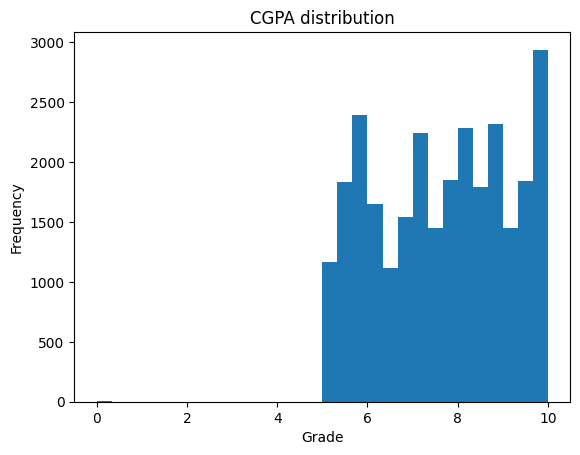

In [8]:
plt.hist(df['CGPA'], bins=30)
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.title("CGPA distribution")
plt.show()

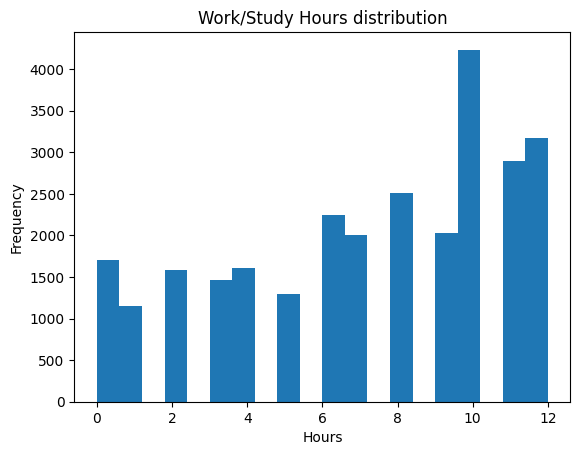

In [9]:
plt.hist(df['Work/Study Hours'], bins=20)
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.title("Work/Study Hours distribution")
plt.show()

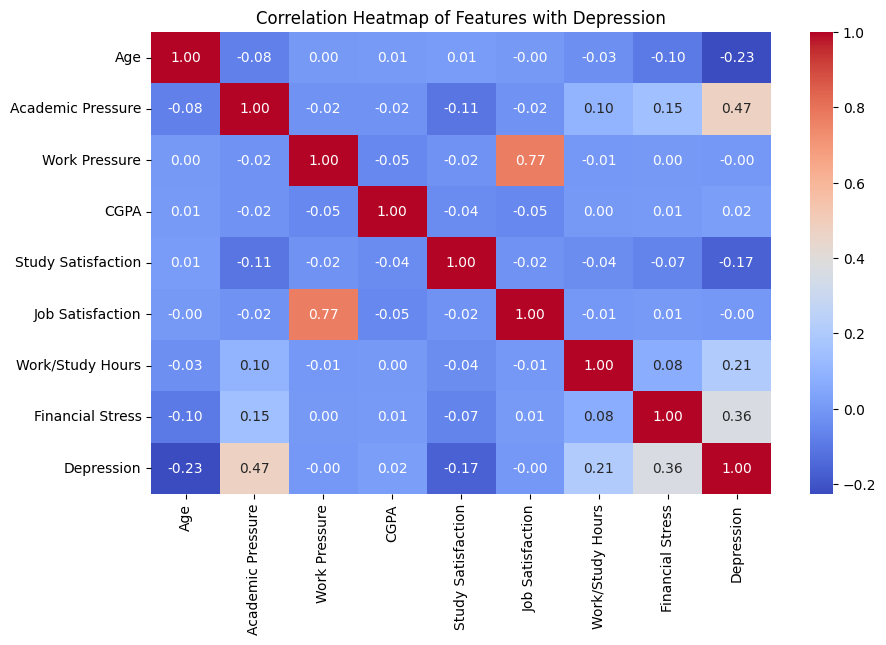

In [10]:
df_numeric = df.select_dtypes(include=['number'])


plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features with Depression")
plt.show()



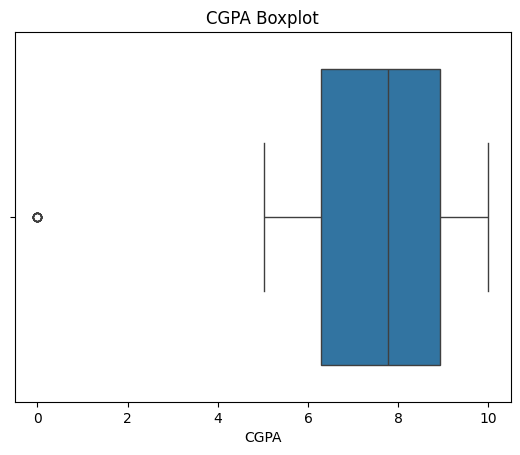

In [11]:
sns.boxplot(x=df["CGPA"])
plt.title("CGPA Boxplot")
plt.show()


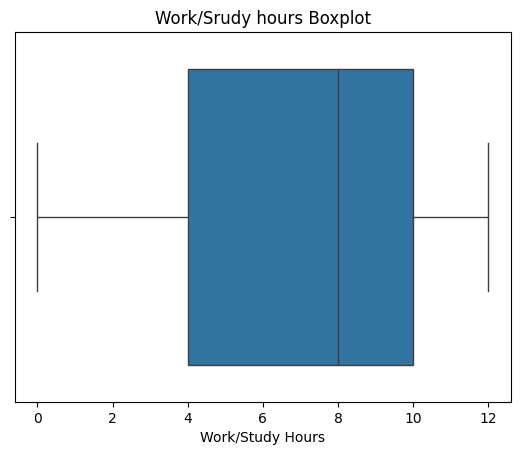

In [12]:
sns.boxplot(x=df["Work/Study Hours"])
plt.title("Work/Srudy hours Boxplot")
plt.show()

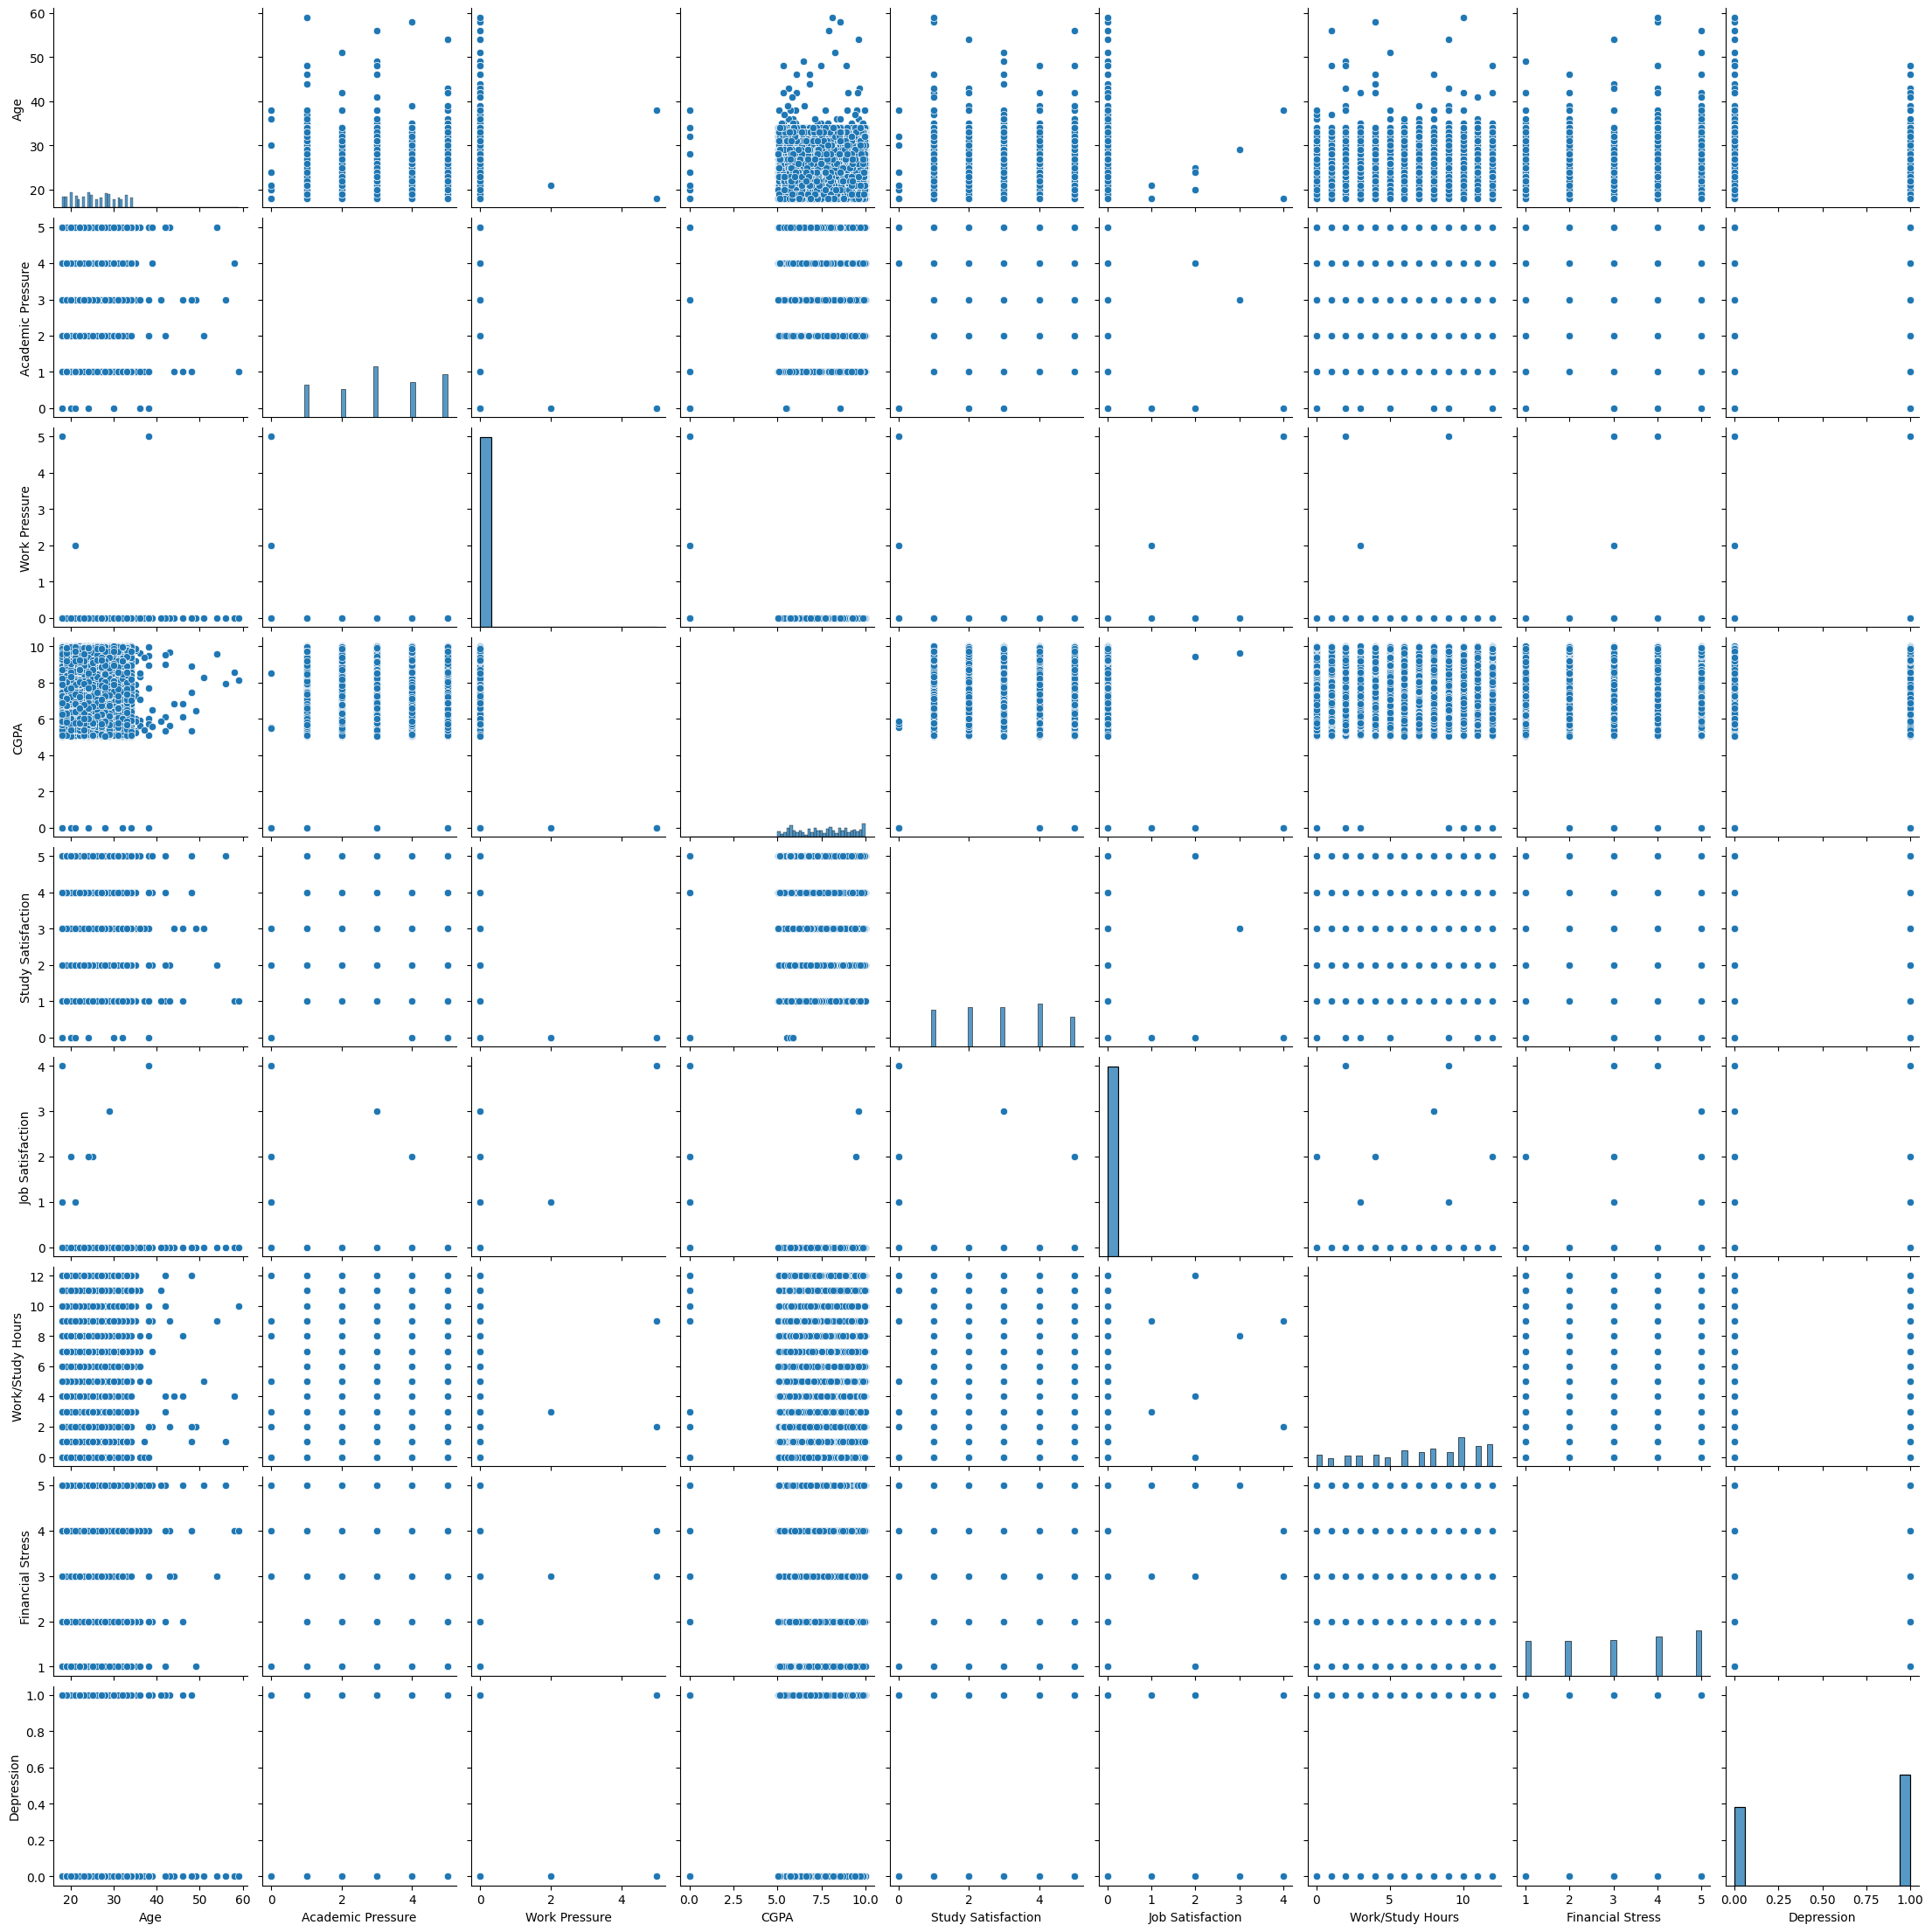

In [13]:
sns.pairplot(df)
plt.show()


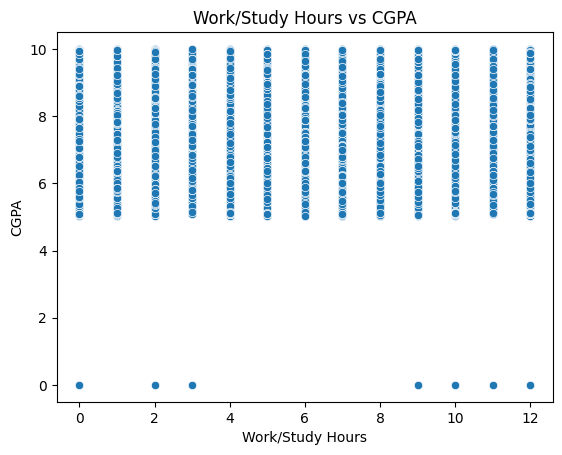

In [14]:
sns.scatterplot(x=df["Work/Study Hours"], y=df["CGPA"])
plt.title("Work/Study Hours vs CGPA")
plt.show()


Task 2 Data Preprocessing

In [15]:
missing_values = df.isnull().sum()

missing_values

Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [16]:
# filling the 3 rows that miss a value in 'Financial Stress' column with mode

df['Financial Stress'].fillna(df['Financial Stress'].mode()[0], inplace=True) 

/var/folders/gv/1ydw07yj7pvc1skb391n8d_c0000gn/T/ipykernel_24081/2885293821.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Financial Stress'].fillna(df['Financial Stress'].mode()[0], inplace=True)


In [17]:
from sklearn.preprocessing import LabelEncoder

model = LabelEncoder()

for col in categorical_columns:
    df[col] = model.fit_transform(df[col])  

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standard_scaling_cols = ['Age', 'Work/Study Hours'] # have hight variance
minmax_scaling_cols = ['Academic Pressure', 'Work Pressure', 'CGPA', 'Financial Stress'] # have fixed lower & upper bounds

# Apply StandardScaler (Z-score normalization)
standard_scaler = StandardScaler()
df[standard_scaling_cols] = standard_scaler.fit_transform(df[standard_scaling_cols])

# Apply MinMaxScaler (0-1 normalization)
minmax_scaler = MinMaxScaler()
df[minmax_scaling_cols] = minmax_scaler.fit_transform(df[minmax_scaling_cols])


Task 3 Training Logistic model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X = df.drop(columns=['Depression'])
y = df['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LogisticRegression(max_iter=500, solver='lbfgs')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.84
Precision: 0.85
Recall: 0.88
F1-score: 0.86


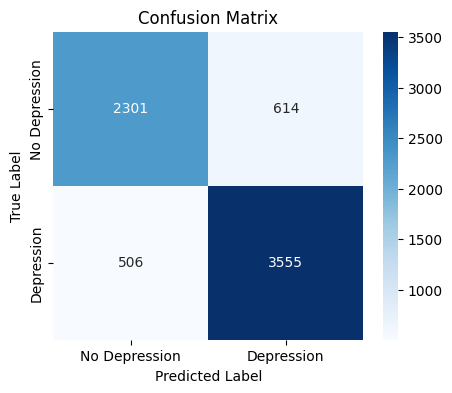

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


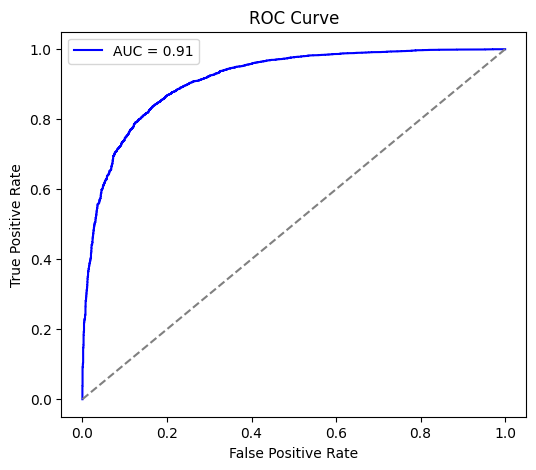

In [22]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

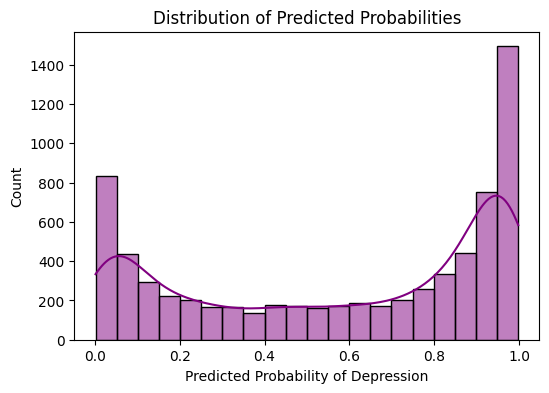

In [23]:
plt.figure(figsize=(6, 4))
sns.histplot(y_pred_proba, bins=20, kde=True, color="purple")
plt.xlabel("Predicted Probability of Depression")
plt.ylabel("Count")
plt.title("Distribution of Predicted Probabilities")
plt.show()

## Part two

### Task 1 – Evaluate and Visualize Metric Changes Across Thresholds
    As we have seen in class, different metrics varry according to the threshold. Explain why.

    Compute the TN, TP, FN and FP manually. 
    Find a way to visualise their evolution according to the threshold. 
    Explain the different variations. What does it tell about your predictions ?

    Do the same with evaluation metrics.

    How would you define the optimal threshold ?

In [24]:
tn, fp, fn, tp = conf_matrix.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 2301
False Positives: 614
False Negatives: 506
True Positives: 3555


In [26]:
import numpy as np

y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

thresholds = np.linspace(0, 1, 100)
tpr = []  # True Positive Rate (Recall)
fpr = []  # False Positive Rate
tn_list, tp_list, fn_list, fp_list = [], [], [], []
y_pred_thresh = []
for thresh in thresholds:
    if y_pred_proba >= thresh:
        y_pred_thresh.append(1)
    else:
        y_pred_thresh.append(0)

    tn_list.append(tn)
    tp_list.append(tp)
    fn_list.append(fn)
    fp_list.append(fp)
    
    tpr.append(tp / (tp + fn))  # Sensitivity
    fpr.append(fp / (fp + tn))  # 1 - Specificity

plt.figure(figsize=(10, 6))
plt.plot(thresholds, tn_list, label="True Negatives (TN)", linestyle='dashed')
plt.plot(thresholds, tp_list, label="True Positives (TP)", linestyle='dashed')
plt.plot(thresholds, fn_list, label="False Negatives (FN)")
plt.plot(thresholds, fp_list, label="False Positives (FP)")
plt.xlabel("Threshold")
plt.ylabel("Count")
plt.title("Evolution of Confusion Matrix Components with Threshold")
plt.legend()
plt.show()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

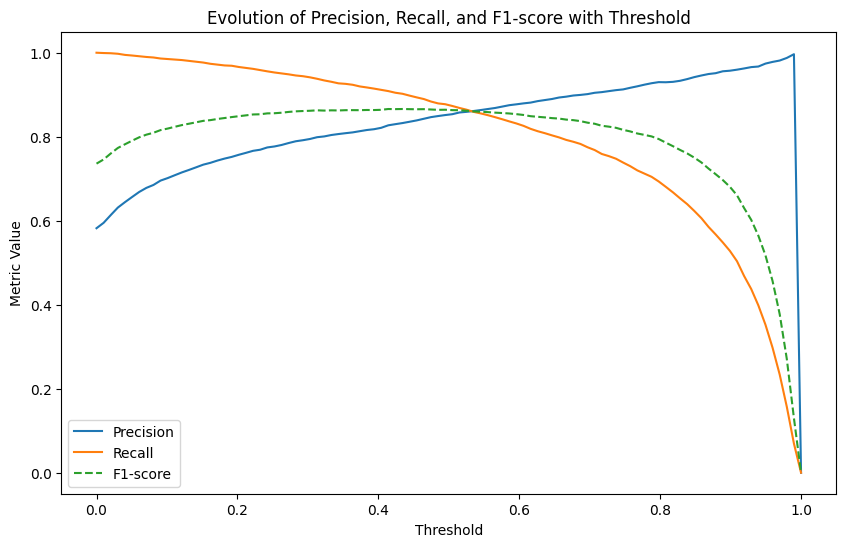

In [27]:
# Get probability scores for class 1
y_scores = model.predict_proba(X_test)[:, 1]

# Define threshold values
thresholds = np.linspace(0, 1, 100)

# Lists to store metric values
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for thresh in thresholds:
    # Convert probabilities to binary predictions
    y_pred_thresh = (y_scores >= thresh).astype(int)
    
    # Compute evaluation metrics
    accuracy_list.append(accuracy_score(y_test, y_pred_thresh))
    precision_list.append(precision_score(y_test, y_pred_thresh, zero_division=0))  # Avoid division by zero
    recall_list.append(recall_score(y_test, y_pred_thresh))
    f1_list.append(f1_score(y_test, y_pred_thresh))


plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_list, label="Precision")
plt.plot(thresholds, recall_list, label="Recall")
plt.plot(thresholds, f1_list, label="F1-score", linestyle="dashed")
plt.xlabel("Threshold")
plt.ylabel("Metric Value")
plt.title("Evolution of Precision, Recall, and F1-score with Threshold")
plt.legend()
plt.show()


### Task 2 - Include a financial cost
    In the context of predicting student depression, if the model outputs a positive prediction (the student is predicted as being depressed), you must pay for the student to go to the hospital. 
    This cost is substantial, therefore, it is crucial not only to evaluate the standard classification metrics—such as accuracy, precision, recall, and F1-score—but also to consider the financial implications of your predictions.

    Find a way to define the optimal threshold, including the cost of a positive prediction.

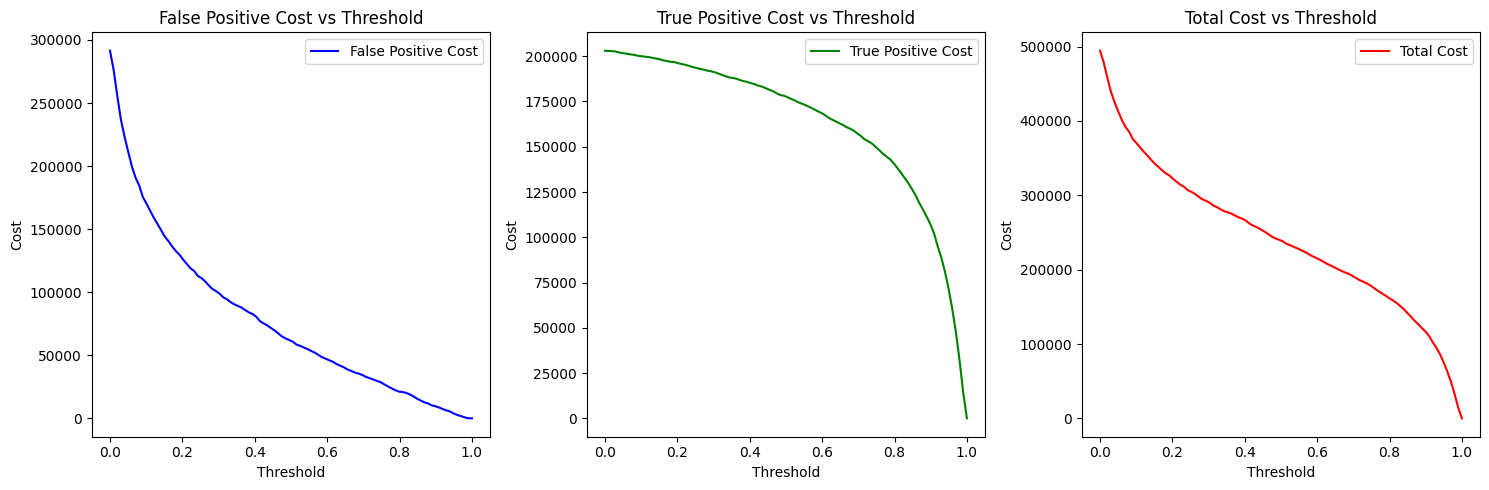

In [28]:


y_scores = model.predict_proba(X_test)[:, 1]

cost_FP = 100  

cost_TP = 50   

thresholds = np.linspace(0, 1, 100)

fp_total = []
tp_total = []
total_costs = []

for thresh in thresholds:
    y_pred_thresh = (y_scores >= thresh).astype(int)
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresh).ravel()

    fp_cost = fp * cost_FP
    tp_cost = tp * cost_TP
    total_cost = fp_cost + tp_cost

    fp_total.append(fp_cost)
    tp_total.append(tp_cost)
    total_costs.append(total_cost)

plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.plot(thresholds, fp_total, label="False Positive Cost", color='blue')
plt.xlabel("Threshold")
plt.ylabel("Cost")
plt.title("False Positive Cost vs Threshold")
plt.legend()


plt.subplot(1, 3, 2)
plt.plot(thresholds, tp_total, label="True Positive Cost", color='green')
plt.xlabel("Threshold")
plt.ylabel("Cost")
plt.title("True Positive Cost vs Threshold")
plt.legend()


plt.subplot(1, 3, 3)
plt.plot(thresholds, total_costs, label="Total Cost", color='red')
plt.xlabel("Threshold")
plt.ylabel("Cost")
plt.title("Total Cost vs Threshold")
plt.legend()

plt.tight_layout()
plt.show()
